# Import af pakker:
Importere standard pakker

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
from sklearn import linear_model
from IPython.core.display import HTML

pd.options.display.max_rows = 100

# Indlæsning af CSV filer
Indlæsning af data i pandas i to forskellige dataframes:

In [2]:
df_brancher = pd.read_csv('data/arbejdsmarkedsanalyse_brancher.csv',delimiter=';',decimal=',',encoding = 'unicode_escape')
df_koen_alder = pd.read_csv('data/arbejdsmarkedsanalyse_koen_alder.csv',delimiter=';',decimal=',',encoding = 'unicode_escape')

# Arbejdsmarkedsanalyse_brancher

In [3]:
# Får et overblik over datasættet:
with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df_brancher.head(2).to_html()))

,Field Values Index,Ordforklaring,Akse,Farveskala,Field Values Index (Fixed),Navigation - Arbejdsmiljøprofiler,Score (Indekseret score) (gennemsnit),Score (Indekseret score) (gennemsnit) (label),Score (Total) (Fixed),Gennemsnit,Score (Indekseret score),Score (Total),Antpct,Antpers,Group,Hoej Score Godt,Kategori10,Kategori11,Kategori12,Kategori13,Kategori14,Kategori15,Kategori1,Kategori2,Kategori3,Kategori4,Kategori5,Kategori6,Kategori7,Kategori8,Kategori9,Main Group,Score,Field Values,Mean,Question Label,Sluttekst,Spm Formulering,Topic Label,Type,Year
0,49.824544,"Spørgsmål: Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?\n\n- 1. Altid\n- 2. Ofte\n- 3. Sommetider\n- 4. Sjældent\n- 5. Aldrig\n\nI resultaterne præsenteres den gennemsnitlige score (1-5).",Score,-5.059771,54.884315,Arbejdsmiljøprofiler,52.180881,2.609044,-2.609044,NaN,53.173963,NaN,NaN,224,Bibliotekarer og beskæftigede med kultur,0,NaN,NaN,NaN,NaN,NaN,NaN,1. Altid,2. Ofte,3. Sommetider,4. Sjældent,5. Aldrig,NaN,NaN,NaN,NaN,Job,2.658698,-2.658698,2.658698,Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige score (1-5).,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",Kvantitative krav og grænseløshed,kont,2018
1,59.245851,"Spørgsmål: Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?\n\n- 1. Altid\n- 2. Ofte\n- 3. Sommetider\n- 4. Sjældent\n- 5. Aldrig\n\nI resultaterne præsenteres den gennemsnitlige score (1-5).",Score,4.361536,54.884315,Arbejdsmiljøprofiler,52.180881,2.609044,-2.609044,NaN,51.324841,NaN,NaN,388,Bogholdere,0,NaN,NaN,NaN,NaN,NaN,NaN,1. Altid,2. Ofte,3. Sommetider,4. Sjældent,5. Aldrig,NaN,NaN,NaN,NaN,Job,2.566242,-2.566242,2.566242,Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige score (1-5).,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",Kvantitative krav og grænseløshed,kont,2018


In [4]:
# Overskydende/irrelevante informationer bliver sorteret fra.
df_brancher = df_brancher[['Group','Topic Label','Spm Formulering','Score (Indekseret score)']]
# Følgende kolonne overskrifter beholdes:
# - Group: Branche de adspurgte personer arbejder i
# - Topic Label: Overordnet Kategori
# - Spm Formulering: Spørgsmållet der bliver stillet
# - Score (Indekseret score): Den indekseret score bruges istedet for "score" eftersom den er skaleret for 
# all spørgsmål fra 1 - 100 istedet for forskellige skalaer.

# Overskueligheden af tabellen undersøges igen
with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df_brancher.head(5).to_html()))

,Group,Topic Label,Spm Formulering,Score (Indekseret score)
0,Bibliotekarer og beskæftigede med kultur,Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",53.173963
1,Bogholdere,Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",51.324841
2,"Brandmænd, reddere og sikkerhedsvagter",Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",45.297700
3,Bude og kurerer,Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",54.245458
4,"Bus- og taxachauffører, lokoførere m.fl.",Kvantitative krav og grænseløshed,"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",46.182196


In [31]:
35*1.2

42.0

## Spørgsmål 1: Er der nogle overraskende correlationer i dataen?

In [5]:
# For at undersøge dette spørgsmål laves der først en correlationsmatrice. Dette kræver dog at formattet på df
# er anderledes. Topic Label bliver transformeret til kolonne overskrifter via pivottable.
df_brancher_Q=pd.pivot_table(df_brancher,values = 'Score (Indekseret score)',index='Group',columns=['Topic Label'],aggfunc=np.mean)
# Herved får hver Topic Label nu en værdi der svarer til gennemsnittet af alle spørgsmål under denne. Spørgsmålene
# vægtes således ens selvom dette måske ikke er tilfældet.

# Erstatter eventuelle NaN med gennemsnittet fra kolonnerne.
df_brancher_Q=df_brancher_Q.apply(lambda x: x.fillna(x.mean())) 
df_brancher_Q


Topic Label,Angstsymptomer,Arbejdsevne,Arbejdspladsens prioritering af arbejdsmiljø,Arbejdsrelateret sygdom,Arbejdstid,Belastende arbejdsstillinger,Depressive symptomer,Egen indsats for arbejdsmiljø,Engagement og mening i arbejdet,Fysisk hårdt arbejde,...,Rummelighed,Sikkerhed på arbejdspladsen,Smerter,Støj og vibrationer,"Støv, dampe og gasser",Sundhedsfremmetilbud,Træthed og søvnproblemer,Ulykker,Uoverskuelighed og stress,Vold og trusler
Group,,,,,,,,,,,,,,,,,,,,,
Bibliotekarer og beskæftigede med kultur,25.272768,80.039851,58.160649,9.806488,22.632052,16.140539,19.652666,72.197565,77.982726,30.455347,...,77.260429,61.983558,16.798486,17.287253,5.373243,27.467566,59.238291,2.799644,45.546937,7.217972
Bogholdere,24.809244,83.738559,58.162677,7.952596,13.669015,9.494745,17.350265,71.133733,74.997635,8.439244,...,76.775803,63.093093,15.856280,22.831446,0.493945,33.719061,56.239793,1.937773,44.133488,0.875693
"Brandmænd, reddere og sikkerhedsvagter",22.920222,81.601860,55.605183,13.703069,47.500416,20.522292,18.012636,71.896520,73.301220,42.055431,...,70.211281,60.744274,19.578612,31.002220,10.542638,33.354969,59.419002,9.976595,43.443058,11.592135
Bude og kurerer,27.903054,75.547289,53.506752,15.651772,27.833199,41.926189,21.859290,65.798177,65.945151,59.140133,...,68.057705,56.846829,22.108987,21.636007,12.337410,15.866094,60.196476,16.395660,45.652838,3.297285
"Bus- og taxachauffører, lokoførere m.fl.",21.799721,75.181782,53.032253,11.469513,41.973949,27.582103,17.001946,71.826415,69.984779,35.695838,...,71.047460,57.403564,17.421981,32.579779,14.460768,27.385715,56.021149,7.750240,43.682131,12.822090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total,23.925724,79.533861,57.160146,10.729088,21.086542,23.015003,17.950678,72.716735,75.184772,33.144525,...,76.313959,61.358851,18.823226,23.926206,9.744464,22.430068,57.883301,7.335411,44.692339,7.078999
Tømrere og snedkere,16.612579,76.240650,53.053690,14.882435,14.232500,63.479096,13.275974,72.860665,73.973889,66.664462,...,72.768200,56.281421,25.950630,48.439364,44.812825,15.628795,55.881602,15.856244,41.812209,2.629706
Undervisere og forskere ved universiteter,26.649738,83.340609,58.860182,8.430850,16.517302,6.114818,19.039846,72.268137,80.629154,11.762928,...,75.272042,63.961692,13.091980,13.585872,2.590092,16.851570,58.369268,2.611996,46.863831,1.910367


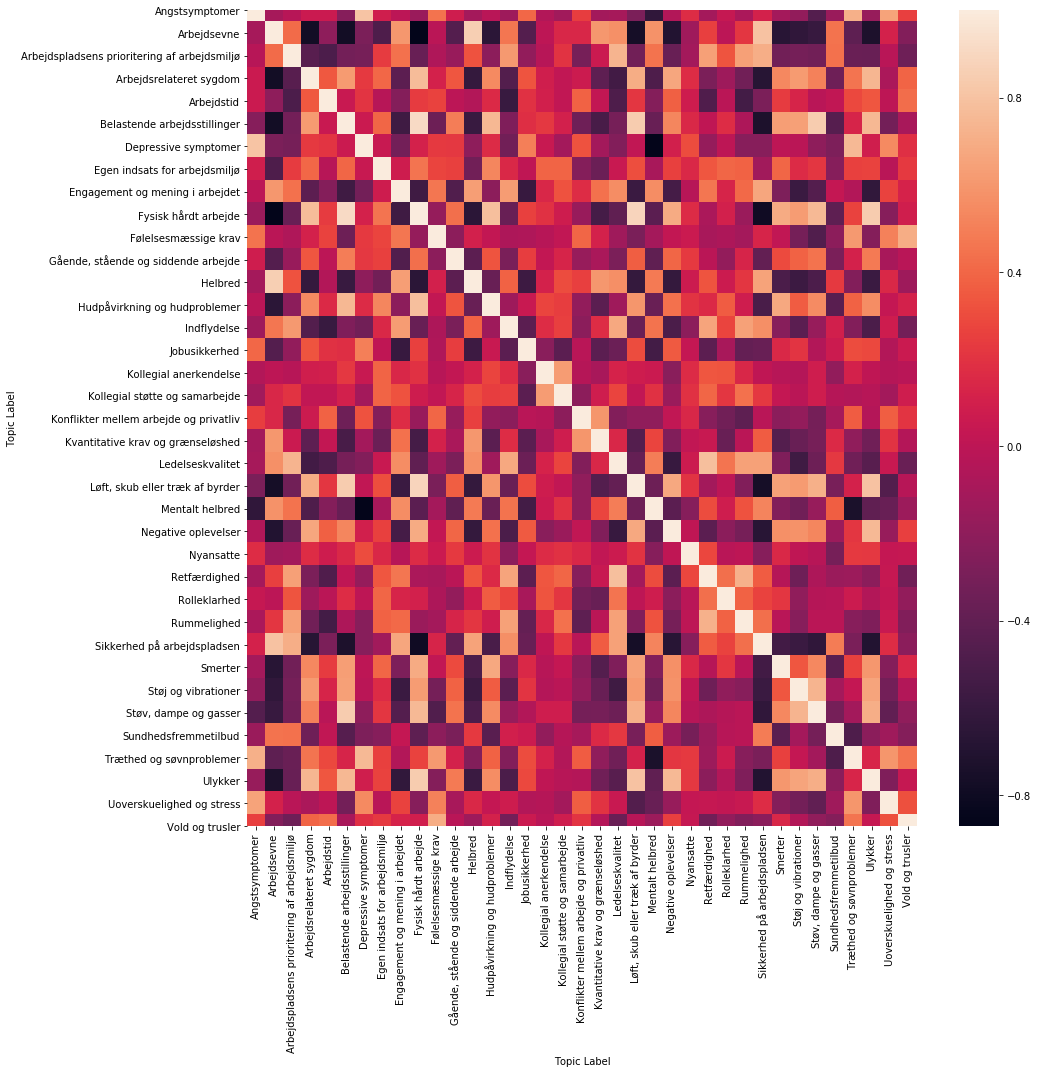

In [6]:
#Der laves en korrelationsanalyse på datasættet for at undersøge sammenhænge:
corr_branches = df_brancher_Q.corr()
# Heatmap
fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corr_branches, annot=False,yticklabels=True,xticklabels=True)

In [7]:
# Ovenstående heatmap er meget uoverskuelig så derfor printes der istedet de hhv. mest og mindst korrelerede labels:
corr_branches_list = (corr_branches.where(np.triu(np.ones(corr_branches.shape), k=1).astype(np.bool))
                      .stack().sort_values(ascending=False))
                 
print('Mest positiv korreleret:')
print(corr_branches_list[0:9])
print('\nMest negativ korreleret:')
print(corr_branches_list[-10:-1])

Mest positiv korreleret:
Topic Label                      Topic Label                    
Belastende arbejdsstillinger     Fysisk hårdt arbejde               0.915148
Fysisk hårdt arbejde             Løft, skub eller træk af byrder    0.888568
Arbejdsevne                      Helbred                            0.855017
Fysisk hårdt arbejde             Ulykker                            0.840965
Belastende arbejdsstillinger     Støv, dampe og gasser              0.839887
                                 Løft, skub eller træk af byrder    0.839882
Angstsymptomer                   Depressive symptomer               0.808885
Løft, skub eller træk af byrder  Ulykker                            0.801546
Arbejdsevne                      Sikkerhed på arbejdspladsen        0.798535
dtype: float64

Mest negativ korreleret:
Topic Label                      Topic Label                    
Belastende arbejdsstillinger     Sikkerhed på arbejdspladsen       -0.726061
Arbejdsevne                      U

Her ses altså ingen overraskende korrelationer der kunne være interesante at undersøge.

## Spørgsmål 2: Hvilke brancher er mest udsat for stress?

In [8]:
# Der kigges på spørgsmål under kategorien "Uoverskuelighed og stress":
df_stress = df_brancher[(df_brancher["Topic Label"]=="Uoverskuelighed og stress")]
df_stress_Q = pd.pivot_table(df_stress,values = 'Score (Indekseret score)',index='Group',
                             columns=['Spm Formulering'],aggfunc=np.mean).reset_index()

# Vi er interesseret i dem der har følt sig stresset pga. job og derfor sorterer vi i denne kategori
df_stress_Q.sort_values(by='Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?')

Spm Formulering,Group,Den samlede score for uoverskuelighed inden for den seneste måned.,Hvor ofte har du følt dig stresset i de seneste to uger?,Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?
59,Servicefag i øvrigt,23.130232,20.241894,40.064308
15,Gartnere og landmænd,25.134643,25.141459,47.367466
2,"Brandmænd, reddere og sikkerhedsvagter",24.683971,20.237258,49.046700
49,Præcisionshåndværkere,25.762712,21.247393,49.882419
20,Jord- og betonarbejdere,23.419080,19.024406,50.390603
...,...,...,...,...
65,Specialundervisere,24.866446,27.636657,70.327617
73,Undervisere og forskere ved universiteter,26.554108,29.124641,73.401598
16,Gymnasielærere,26.141348,31.519134,73.590295
63,Socialrådgivere,29.139723,31.930280,73.722229


Spm Formulering,Group,Den samlede score for uoverskuelighed inden for den seneste måned.,Hvor ofte har du følt dig stresset i de seneste to uger?,Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?
0,Bibliotekarer og beskæftigede med kultur,25.092669,27.537563,63.404295
1,Bogholdere,25.792626,23.920620,57.751270
2,"Brandmænd, reddere og sikkerhedsvagter",24.683971,20.237258,49.046700
3,Bude og kurerer,27.855682,27.263765,60.445849
4,"Bus- og taxachauffører, lokoførere m.fl.",24.376899,21.385626,55.752404
5,Butikssælgere,26.436643,28.057638,61.191580
6,Bygge- og anlægsarbejdere,22.614035,17.793305,50.394796
7,Dagplejere og børneomsorgsbeskæftigede,22.573350,23.093111,55.056335
8,"Direktions-, læge-, og advokatsekretærer",24.222469,25.993512,63.075728
9,Ejendoms- og rengøringsinspektører,23.716637,21.340790,55.719751


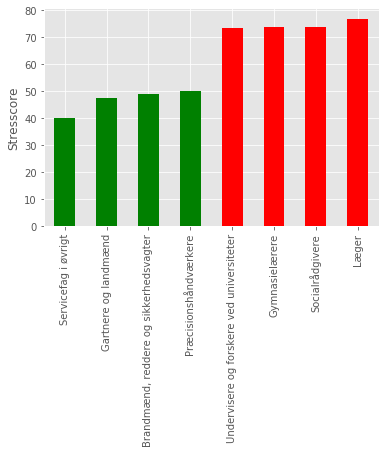

In [71]:
from itertools import cycle, islice


# Plot function:
def plot_bar_data(df,target):
    '''Returns 4 biggest and 4 smallest values of given string'''
    sorted_df = df.sort_values(by=[target])
    plot_max = sorted_df.iloc[-4:]
    plot_min = sorted_df.iloc[0:4]
    plot_all = pd.concat([plot_min,plot_max])
    my_colors = list(islice(cycle(['g', 'g', 'g', 'g', 'r', 'r', 'r', 'r']), None, len(plot_all)))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
 #   ax=plot_max[target].plot(kind='bar', color='tab:blue');
#    ax=plot_min[target].plot(kind='bar', color=my_colors);
    ax=plot_all[target].plot(kind='bar',  color=my_colors);
    ax.set_xticklabels(plot_all['Group'])
    return

plt.style.use('ggplot')
plot_bar_data(df_stress_Q,'Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?')
plt.ylabel('Stresscore')
#ax.set_title('Følelsesmæssige krav fra scala 1:5 (5 er meget krævende)')
# GØR FLOT MOTHERFUCKER OG HVOR ER FUCKING LÆGER MAND
df_stress_Q

Så hvorfor er f.eks. "læger"  mere stressede end "servicefag i øvrigt"? Vi kan undersøge hvilke spørgsmål de svarer mest forskelligt på. Måske dette kan give et svar.

In [10]:
# Laver 2 df for henholdhvis "læger" og "servicefag i øvrigt"
df_læger = pd.pivot_table(df_brancher.query('Group == "Læger"'),values = 'Score (Indekseret score)',index='Group',
                          columns=['Spm Formulering'],fill_value=None)
df_servicefag = pd.pivot_table(df_brancher.query('Group == "Servicefag i øvrigt"'),values = 'Score (Indekseret score)',index='Group',
                               columns=['Spm Formulering'],fill_value=None)
# Sætter dem sammen
df_minmaxstress = df_servicefag.append(df_læger,sort=False)

# Kigger på forskellen i indikseret score for alle spørgsmål:
df_minmaxstress.loc['Absolute Diff'] =  np.abs(df_minmaxstress.loc['Servicefag i øvrigt'] - df_minmaxstress.loc['Læger'])
df_minmaxstress = df_minmaxstress.sort_values(by='Absolute Diff', axis=1,ascending=False)
df_minmaxstress = df_minmaxstress.replace(0, pd.np.nan).dropna(axis=1, how='any')
df_minmaxstress


,Hvor stor en del af din arbejdstid bærer eller løfter du?,Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?,"Hvor stor en del af din arbejdstid gør du de samme armbevægelser mange gange i minuttet (fx pakkearbejde, montering, maskinfødning, udskæring)?",Hvor stor en del af din arbejdstid skubber eller trækker du?,"Hvor ofte skal du tage stilling til fx klienters, patienters eller elevers problemer i dit arbejde (ikke dine kollegers problemer)?",Hvor stor en del af din arbejdstid har du hudkontakt med kemikalier (fx rengøringsmidler og desinfektionsmidler)?,Har du indenfor det sidste år fået tilbud om brug af motionsfaciliteter eller ugentlig motion via din arbejdsplads?,"Har du indenfor det sidste år fået et tilbud om behandling (fx fysioterapi, psykolog el.lign.) via din arbejdsplads?",På hvilket tidspunkt af døgnet arbejder du sædvanligvis i din hovedbeskæftigelse?,Hvor stor en del af din arbejdstid er du udsat for at have våde eller fugtige hænder?,...,Hvor ofte bliver alle medarbejdere behandlet retfærdigt på arbejdspladsen?,Jeg får den nødvendige vejledning og instruktion i sikker udførelse af arbejdet,"Hvor ofte samarbejder du og dine kolleger, når der opstår problemer, som kræver løsninger?",Hvor ofte anerkender du og dine kolleger hinanden i arbejdet?,"Har du indenfor de seneste 12 måneder haft hudproblemer på hænderne (kløe, røde knopper, røde plamager, tør og revnet hud og/eller små vandblærer)?",Hvor ofte tages der hensyn til medarbejdere med færre kræfter (fx ældre eller syge) på din arbejdsplads?,Hvor ofte tager din nærmeste leder sig tid til at engagere sig i din faglige udvikling?,"I hvilken grad bliver medarbejderne på din arbejdsplads involveret i beslutninger, som påvirker jeres arbejdsmiljø?",Den samlede score for ledelseskvalitet,"Hvor ofte har du indflydelse på, hvordan du løser dine arbejdsopgaver?"
Group,,,,,,,,,,,,,,,,,,,,,
Servicefag i øvrigt,49.726270,40.064308,43.177692,33.308914,54.616071,12.674212,10.950211,37.271705,14.884894,11.110510,...,73.959148,62.651685,86.022050,79.534142,20.577952,72.870477,64.706064,56.265470,68.502803,81.679193
Læger,1.565066,76.797003,10.617028,2.325257,83.984050,40.957919,37.989037,12.307185,39.674854,31.784593,...,74.820539,62.004607,85.603306,79.948717,20.929227,73.193979,64.935921,56.140411,68.390251,81.728058
Absolute Diff,48.161204,36.732694,32.560663,30.983657,29.367979,28.283707,27.038825,24.964520,24.789960,20.674084,...,0.861392,0.647078,0.418744,0.414575,0.351274,0.323502,0.229857,0.125059,0.112552,0.048865


Der er nogle store forskellge på de 2 grupper, men umiddelbart ikke dem vi er ude efter. Vi prøver derfor
en anden fremgangsmåde:

## Spørgsmål 3: Hvilke faktorer kontribuerer mest til stress?

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Initializere df_brancher_Q igen:
df_brancher_Q = pd.pivot_table(df_brancher,values = 'Score (Indekseret score)',index='Group',columns=['Spm Formulering'])
df_brancher_Q = df_brancher_Q.apply(lambda x: x.fillna(x.mean())) 


# y værdien vi prøver at prædiktere scoren, som de adspurgte folk har givet 
# spørgsmålet: "Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?"
y = df_brancher_Q['Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?'].values

# Vi fjerne alle spørgsmål der har med stress at gøre:
df_brancher_Q=df_brancher_Q.drop(columns=['Hvor ofte har du følt dig stresset pga. dit arbejde i de seneste to uger?',
                'Hvor ofte har du følt dig stresset i de seneste to uger?',
                'Den samlede score for uoverskuelighed inden for den seneste måned.'])
X = df_brancher_Q.values

# Linear regression med cross validation:
lr = LinearRegression() 
scores = cross_validate(lr, X, y, cv=10,return_estimator=True,scoring=('r2', 'neg_mean_squared_error')) # Make crossvalidation

# Udregner den gennemsnitlige accuracy
linear_weights=0
for model in scores['estimator']:
    linear_weights = linear_weights + model.coef_
linear_weights=linear_weights/len(scores['estimator'])


weights = pd.DataFrame(np.reshape(linear_weights,(1,-1)), columns=np.array(df_brancher_Q.columns)) 
combined=weights.append(df_brancher_Q)
print("MSE =", np.mean(scores['test_neg_mean_squared_error']))
print("R^2 =" ,np.mean(scores['test_r2']))

MSE = -39.43504166017161
R^2 = -1.2420563137765188


In [30]:
# MSE er meget høj (Den er negativ da cross_validate prøver at maksimere istedet for at minimere)
# R^2 er negativ og gennemsnittet beskriver altså vores data bedre end modellen gør.
# Altså er linear regression ikke vejen frem. Dette skyldes nok træningseksempler < features og multicollinearity
# Feature selection vil nok hjælpe her!
# Vi forsøger ar bruge Ridge regression istedet.
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1431)

#cross validation:
#ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,20,50,100,200,400,
#                        800,1000,2000,4000,5000,6000,7000,8000,10000],cv=15).fit(X_train, y_train)

# Leave one out cross validation:
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,20,50,100,200,400,
                        800,1000,2000,4000,5000,6000,7000,8000],store_cv_values = True).fit(X_train, y_train)

# Der tjekkes at vi har fundet et minimum:
print('MSE for alphas = ',np.mean(ridge.cv_values_, axis=0))
print('Reguleringsparameter (alpha) der giver lavest MSE =',ridge.alpha_,'\n')

# Vi tjekker hvor god modellen er til at prædiktere:
y_pred = ridge.predict(X_test)
print('Prediction accuracy')
print("MSE  =", mean_squared_error(y_test, y_pred))
print("R^2  =" ,ridge.score(X_test,y_test))

print('')
print(y_pred)
print(y_test)

MSE for alphas =  [39.76834814 39.7318651  39.3881737  37.22131352 32.43580621 30.55725812
 27.80101197 25.81732503 24.26483618 23.33036113 23.03342396 23.04401376
 23.22129615 23.40102848 23.45668098 23.51268012 23.57372231 23.64108039]
Reguleringsparameter (alpha) der giver lavest MSE = 800.0 

Prediction accuracy
MSE  = 17.47766062952489
R^2  = 0.696707619030053

[57.29429815 49.53430041 53.85029573 56.98368108 73.01195007 54.34914098
 51.89456189 58.41217132 59.44331104 56.96332487 67.70513626 55.55438309]
[56.2542014  52.52063791 50.39479556 51.95503717 73.59029486 56.43761891
 58.65195124 56.80784852 61.19158036 49.88241912 73.40159837 60.44584871]


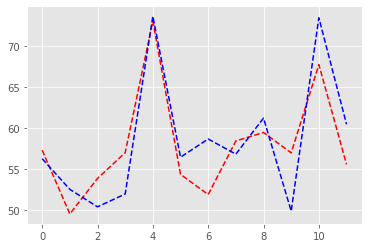

In [28]:
plt.plot(range(len(y_pred)), y_pred, 'r--', range(len(y_pred)), y_test, 'b--')
plt.show()

 Vi kan altså se at vores model er i stand til at prædiktere nogenlunde. Den kunne dog sagtens optimeres.
Det skal dog også lige nævnes at test accuracy er bedre end trænings accuracy, hvilket er mærkeligt. Her kunne man
 lave endnu et nested loop for at teste flere test scorer og dermed teste robustheden.

In [22]:
# Nu da vi har fået vægtene af den trænede model kan vi gå ind og se på vigtigheden af hver feature vha. disse vægte.
weights = pd.DataFrame(np.reshape(ridge.coef_,(1,-1)), columns=np.array(df_brancher_Q.columns))
weights.sort_values(by=0, axis=1,ascending=False).rename(index={0: 'Feature vægte (vigtigste først):'}).T


,Feature vægte (vigtigste først):
"Hvor ofte har du tidsfrister, som er svære at holde?",0.169939
Har du indenfor det sidste år fået et tilbud om rygestop via din arbejdsplads?,0.122048
Hvor ofte er det nødvendigt at holde et højt arbejdstempo?,0.109780
Hvor ofte har du følt dig træt i løbet af dagen inden for de sidste 4 uger?,0.106194
"Har du indenfor de sidste 12 måneder været vidne til, at nogen på din arbejdsplads er blevet udsat for mobning?",0.103090
"Hvor ofte oplever du, at dit arbejde tager så meget af din tid, at det går ud over privatlivet?",0.102935
"Hvor ofte får du uventede arbejdsopgaver, der sætter dig under tidspres?",0.089663
"Hvor ofte oplever du, at dit arbejde tager så meget af din energi, at det går ud over privatlivet?",0.088606
"Hvor ofte oplever du, at du har nok tid til dine arbejdsopgaver?",0.082623
Hvor ofte er det nødvendigt at arbejde over?,0.080387


Ser man på ovenstående tabel kan man altså se at der er mange symptomer på stress og ikke rigtige årsager, der er dog nogle interessante fund...

# Arbejdsmarkedsanalyse_køn_alder

In [14]:
# Får et overblik over tabellen
with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df_koen_alder.head(2).to_html()))

,Group,Question Label,Topic Label,Year,Akse,Ordforklaring,Antpers,Farveskala,Gennemsnit,Score (Indekseret score) (gennemsnit) (label),Score (Indekseret score) (gennemsnit),Score (Indekseret score),Score
0,"Mænd, 55 - 64 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",5080,38.852616,NaN,NaN,NaN,18.223967,0.911198
1,"Mænd, 45 - 54 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",5367,29.425529,NaN,NaN,NaN,19.637802,0.981890


In [15]:
# Overskydende/irrelevante informationer bliver fjernet.
df_koen_alder = df_koen_alder[['Group','Antpers','Question Label','Topic Label','Ordforklaring','Score (Indekseret score)']]
# Følgende Column overskrifter beholdes:
# - Group: Køn & Alder
# - Question Label: Overordnet Kategori
# - Ordforklaring: Spørgsmållet der er stillet
# - Score (Indekseret score): Den indekseret score bruges istedet for bare "score" eftersom den er skaleret for 
# all spørgsmål fra 1 - 100 istedet for forskellige skalaer.

# Deler "Group" op i "Køn" og "Alder" 
df_koen_alder['Køn'] = df_koen_alder['Group'].str.split(",").str[0]
df_koen_alder['Alder'] = df_koen_alder['Group'].str.split(", ").str[1]
#df_koen_alder = df_koen_alder.drop(['Group'],axis=1)

# Overskueligheden af tabellen undersøges igen:
with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df_koen_alder.head(5).to_html()))

,Group,Antpers,Question Label,Topic Label,Ordforklaring,Score (Indekseret score),Køn,Alder
0,"Mænd, 55 - 64 år",5080,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",18.223967,Mænd,55 - 64 år
1,"Mænd, 45 - 54 år",5367,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",19.637802,Mænd,45 - 54 år
2,"Mænd, 35 - 44 år",3496,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",21.286060,Mænd,35 - 44 år
3,"Mænd, 25 - 34 år",1876,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",23.717605,Mænd,25 - 34 år
4,"Mænd, 18 - 24 år",591,Symptomer på angst,Angstsymptomer,"Spørgsmål: I de sidste fire uger, hvor meget har du været generet af; A) at du pludselig bliver bange uden grund; B) nervøsitet eller indre uro; C) anfald af rædsel eller panik; D) at bekymre dig for meget?\n\n-Slet ikke\n-Lidt / Noget / En hel del / Særdeles meget\n\nI resultaterne præsenteres den samlede score for antal forskellige symptomer (0-4).",22.635273,Mænd,18 - 24 år


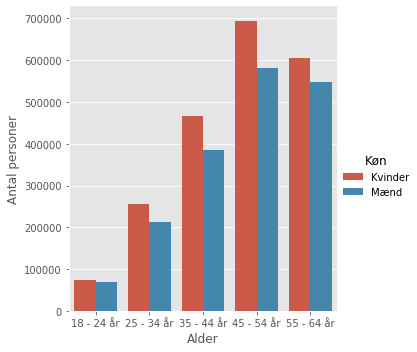

In [16]:
# Plot antallet af adspurgte personer
df_alder = df_koen_alder.groupby(['Group', 'Køn', 'Alder'])['Antpers'].agg(['sum','count']).sort_index(level=['Alder'])
df_alder['Køn'] = df_alder.index.get_level_values(1)
df_alder['Alder'] = df_alder.index.get_level_values(-1)

plt.style.use('ggplot')
sns.catplot(x="Alder", y="sum", hue="Køn", kind="bar", data=df_alder)
plt.xlabel('Alder')
plt.ylabel('Antal personer')
plt.show()

Text(33.60718750000001, 0.5, 'Gennemsnitlig stresscore')

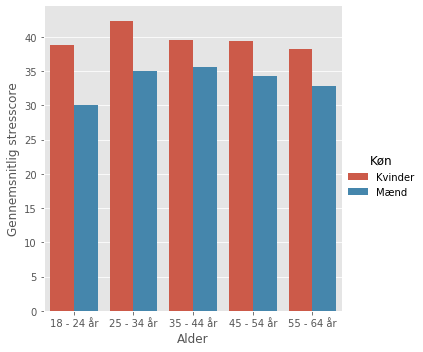

In [17]:
# Plot stresscore baseret på spørgsmål relateret til stress
df_stress = df_koen_alder[(df_koen_alder["Topic Label"]=="Uoverskuelighed og stress")]
df_stress= df_stress[df_stress['Ordforklaring'].notna()]

df_stress_score = df_stress.groupby(['Group', 'Køn', 'Alder'])['Score (Indekseret score)'].agg(['mean']).sort_index(level=['Alder'])
df_stress_score['Køn'] = df_stress_score.index.get_level_values(1)
df_stress_score['Alder'] = df_stress_score.index.get_level_values(-1)
df_stress_score

plt.style.use('ggplot')
sns.catplot(x="Alder", y="mean", hue="Køn", kind="bar", data=df_stress_score)
plt.xlabel('Alder')
plt.ylabel('Gennemsnitlig stresscore')


## Spørgsmål 4: Er der nogle interessante forskelle på mænd og kvinder?

In [32]:
# Laver 2 df, en for mænd og en for kvinder
df_kvinder = df_koen_alder[(df_koen_alder["Group"].isin(["Kvinder"]))]
df_mænd = df_koen_alder[(df_koen_alder["Group"].isin(["Mænd"]))]

# Spørgsmålene bliver grupperet i deres kategori
df_kvinder=df_kvinder.groupby('Topic Label').mean()
df_mænd=df_mænd.groupby('Topic Label').mean()

# Kategori scorene for kvinderne bliver trukket fra mændene
df_mænd_vs_kvinder=pd.DataFrame(df_mænd["Score (Indekseret score)"] - df_kvinder["Score (Indekseret score)"])
t = df_mænd_vs_kvinder.sort_values(by='Score (Indekseret score)',ascending=False).reset_index().rename(columns={
    'Score (Indekseret score)': 'Indekseret score (Positiv mænd, negativ kvinder)'})

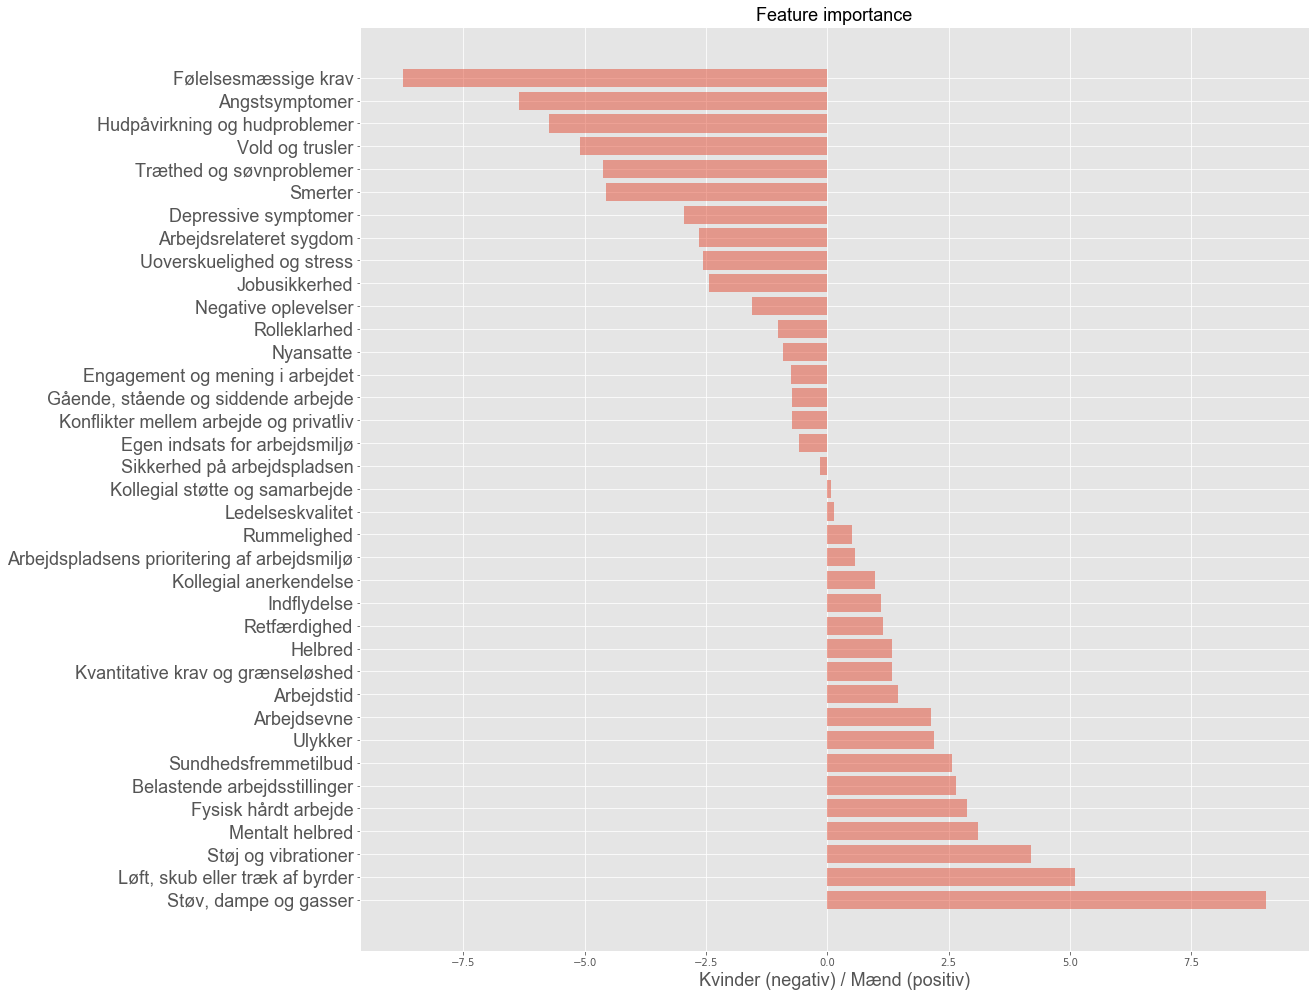

In [68]:
axis_font = {'fontname':'Arial', 'size':'18'}

plt.figure(figsize=(17,17))
#plt.axes().set_facecolor("white")
plt.barh(np.arange(len(t['Topic Label'])), t['Indekseret score (Positiv mænd, negativ kvinder)'], align='center', alpha=0.5)
plt.yticks(np.arange(len(t['Topic Label'])), t['Topic Label'], **axis_font)
plt.xlabel('Kvinder (negativ) / Mænd (positiv)', **axis_font)
plt.title('Feature importance', **axis_font)
plt.show()

Vi kan se at mænd generelt er mere udfordret fysisk, mens kvinder mere psykisk. En intersant opdagelse er at "Ledelseskvalitet" næsten er lige mellem mand og kvinde. Dette er uventet og vil blive undersøgt nærmere.

Vi dykker nu ned i kategorien "Ledelseskvalitet" og ser hvilke spørgsmål der blev stillet.

In [19]:
# Laver 2 df for mænd og kvinder vedr. ledelseskvalitet
df_kvinder_ledelse= df_koen_alder[(df_koen_alder["Group"].isin(["Kvinder"])&(df_koen_alder["Topic Label"]=="Ledelseskvalitet"))]
df_mænd_ledelse = df_koen_alder[(df_koen_alder["Group"].isin(["Mænd"])&(df_koen_alder["Topic Label"]=="Ledelseskvalitet"))]

# gennemsnittet tages
df_kvinder_ledelse = df_kvinder_ledelse.groupby(["Question Label"]).mean()
df_mænd_ledelse = df_mænd_ledelse.groupby(["Question Label"]).mean()

#De forskellige scorer mellem kvinder og mænde bliver trukket fra hinanden.
df_mænd_vs_kvinder_ledelse=pd.DataFrame(df_mænd_ledelse["Score (Indekseret score)"] - df_kvinder_ledelse["Score (Indekseret score)"])

# Sorteres i df og ændres overskrift for "Indekseret score"
df_mænd_vs_kvinder_ledelse.sort_values(by='Score (Indekseret score)',ascending=False).reset_index().rename(columns={
    'Score (Indekseret score)': 'Indekseret score (Positiv mænd, negativ kvinder)'})


,Question Label,"Indekseret score (Positiv mænd, negativ kvinder)"
0,Tilstrækkelige beføjelser i forhold til ansvar,2.151443
1,Modtager nødvendig ris og ros,0.620927
2,Virksomhedens mål forklaret i forhold til opgaver,0.495522
3,Gennemsnit af spørgsmålene om ledelseskvalitet,0.376460
4,Arbejdsmæssig anerkendelse og påskønnelse fra ...,0.311905
5,Leder involverer dig i tilrettelæggelsen af di...,0.274259
6,Hjælp og støtte fra nærmeste leder,-0.271287
7,Leder engagerer sig i din faglige udvikling,-0.864501
8,Stoler på udmeldinger fra ledelsen,-1.892117


Vi kan nu se at der er en forskel på hvordan mænd og kvinders vægter ledelseskvaliteter. Denne forskel er dog meget lille.